# Complete RFM Segmentation for Online Retail Dataset


In [1]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("Online Retail.xlsx", nrows=100000, usecols="A:G")
df = df.dropna(subset=["CustomerID"])
df["CustomerID"] = df["CustomerID"].astype(str)
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
reference_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])
rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)


Matplotlib created a temporary cache directory at C:\Users\Nike\AppData\Local\Temp\matplotlib-6qstjioi because the default path (C:\Users\Nike\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:

rfm["Segment"] = "Others"
rfm.loc[rfm["RFM_Score"] >= 12, "Segment"] = "Champions"
rfm.loc[(rfm["RFM_Score"] >= 9) & (rfm["RFM_Score"] < 12), "Segment"] = "Loyal Customers"
rfm.loc[(rfm["RFM_Score"] >= 6) & (rfm["RFM_Score"] < 9), "Segment"] = "Potential Loyalist"
rfm.loc[rfm["RFM_Score"] < 6, "Segment"] = "Needs Attention"
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
0,12346.0,37,2,0.00,3,3,1,331,7,Potential Loyalist
1,12347.0,28,2,1187.18,3,3,5,335,11,Loyal Customers
2,12348.0,30,2,1120.24,3,3,5,335,11,Loyal Customers
3,12350.0,21,1,334.40,4,1,3,413,8,Potential Loyalist
4,12352.0,8,1,296.50,5,1,3,513,9,Loyal Customers



## What is RFM?

- **Recency**: Days since last purchase (lower is better)
- **Frequency**: Number of purchases (higher is better)
- **Monetary**: Total spend (higher is better)

### Segment Meaning

- **Champions**: Frequent, recent, high spenders
- **Loyal Customers**: Reliable, repeat buyers
- **Potential Loyalists**: Emerging loyal customers
- **Needs Attention**: Risk of churn


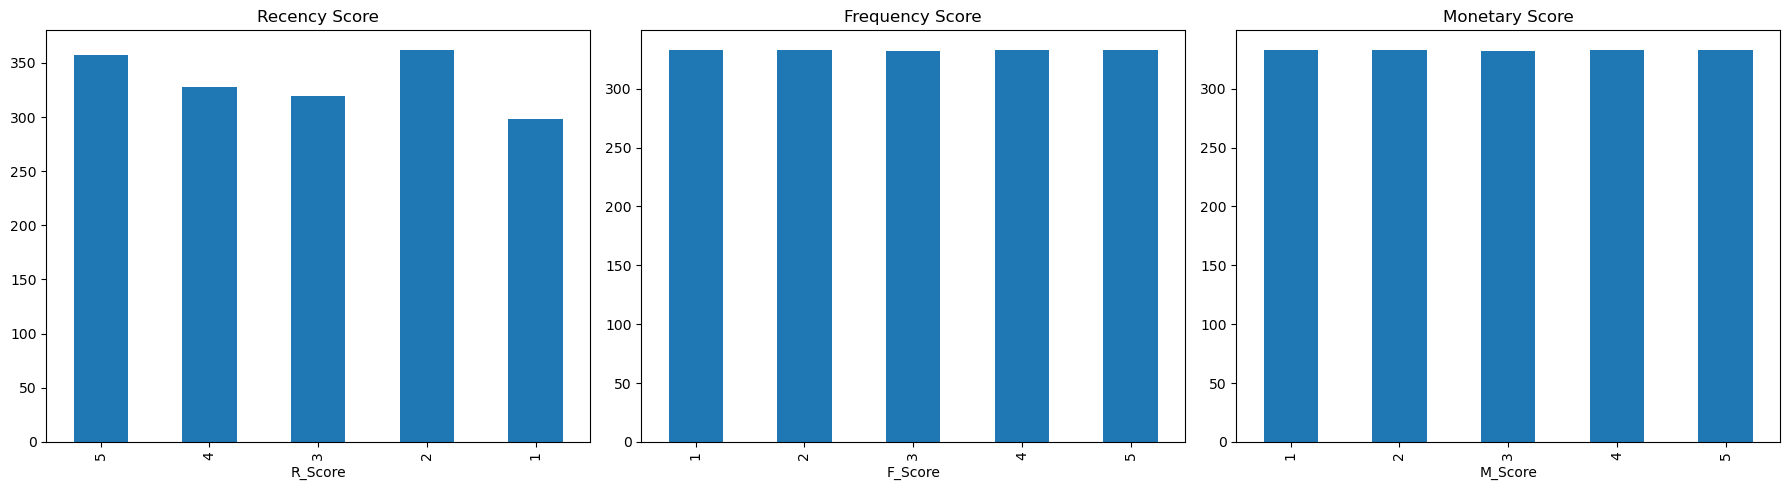

In [5]:

# RFM Score Bar Charts
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
rfm["R_Score"].value_counts().sort_index().plot(kind="bar", ax=axs[0], title="Recency Score")
rfm["F_Score"].value_counts().sort_index().plot(kind="bar", ax=axs[1], title="Frequency Score")
rfm["M_Score"].value_counts().sort_index().plot(kind="bar", ax=axs[2], title="Monetary Score")
plt.tight_layout()
plt.show()


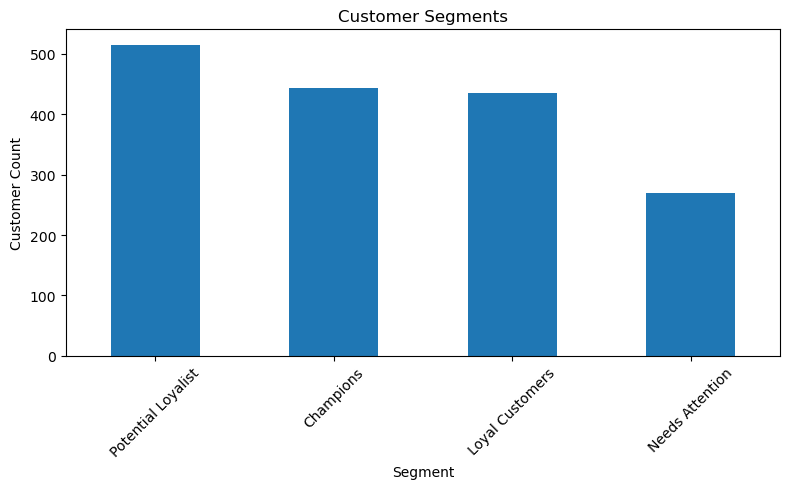

In [7]:

# Segment Bar Chart
rfm["Segment"].value_counts().sort_values(ascending=False).plot(
    kind="bar", figsize=(8, 5), title="Customer Segments"
)
plt.ylabel("Customer Count")
plt.xlabel("Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:

# Save final dataset
rfm.to_csv("RFM_OnlineRetail_CompleteSegmented.csv", index=False)
